By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/12

Videos:
* [[10分鐘搞懂機器學習] 8.13 Python實作 堆疊泛化 Stacking (Stacked Generalization)](https://youtu.be/SctRZ769u94)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


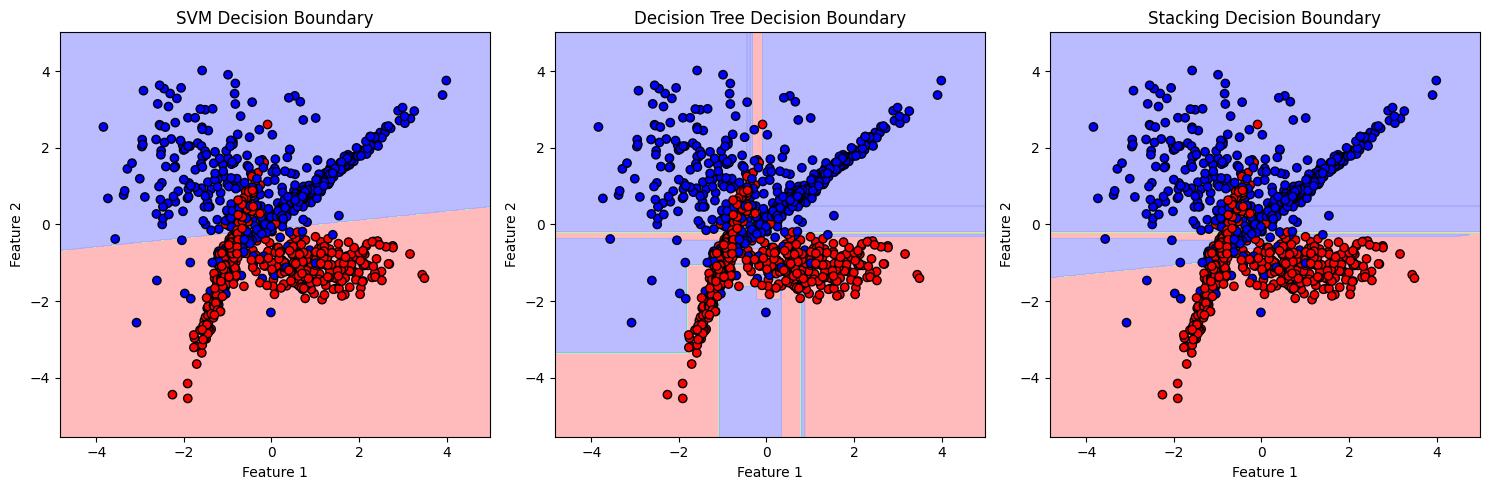

Accuracy of Single SVM Model: 0.8767
Accuracy of Single Decision Tree Model: 0.9033
Accuracy of Stacking Model: 0.9233


In [ ]:
# Python code 比較使用stacking和沒有使用stacking的效能差異: 單一模型使用SVM和決策樹，stacking base models使用決策樹和SVM，blender使用logistic regressor，繪製SVM、決策樹、stacking的decision boundaries，以及計算準確率
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap




# 1. Generate synthetic dataset with 2 features for easy visualization
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Single model: SVM
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# 3. Single model: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42 )
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# 4. Stacking ensemble
# Define base models
base_models = [
    ("decision_tree", DecisionTreeClassifier(random_state=42)),
    ("svm", SVC(kernel='linear', C=1, random_state=42)),
]

# Define blender/meta-learner
meta_model = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)

# 5. Decision boundary visualization
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(svm_model, X, y, "SVM Decision Boundary")

plt.subplot(1, 3, 2)
plot_decision_boundary(dt_model, X, y, "Decision Tree Decision Boundary")

plt.subplot(1, 3, 3)
plot_decision_boundary(stacking_model, X, y, "Stacking Decision Boundary")

plt.tight_layout()
plt.show()

# 6. Compare results
print("Accuracy of Single SVM Model: {:.4f}".format(svm_accuracy))
print("Accuracy of Single Decision Tree Model: {:.4f}".format(dt_accuracy))
print("Accuracy of Stacking Model: {:.4f}".format(stacking_accuracy))
